## First part: assessing if an image patch is blurred or not.

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image
from sklearn import linear_model
import cv2

In [2]:
# Helper functions

def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

def img_crop(im, w, h):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
            list_patches.append(im_patch)
    return list_patches



def img_crop_window(im, w, h):
    kW=71
    list_patches = []
    
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    
    pad = (kW - 1) // 2
    im = cv2.copyMakeBorder(im, pad, pad, pad, pad,cv2.BORDER_REFLECT)
    is_2d = len(im.shape) < 3
    
    for i in range(pad,imgheight+pad,h):
        for j in range(pad,imgheight+pad,w):
            if is_2d:
                im_patch = im[j-pad:j+pad+1, i-pad :i+pad +1]
            else:
                im_patch =im[j-pad:j+pad+1, i-pad :i+pad +1,:]
            list_patches.append(im_patch)
    return list_patches

def extract_patch(n, patch_size, imgs):
    # Extract patches from input images
    img_patches = [img_crop(imgs[i], patch_size, patch_size) for i in range(n)]
    #gt_patches = [img_crop(gt_imgs[i], patch_size, patch_size) for i in range(n)]

    # Linearize list of patches
    img_patches = np.asarray([img_patches[i][j] for i in range(len(img_patches)) for j in range(len(img_patches[i]))])
    #gt_patches =  np.asarray([gt_patches[i][j] for i in range(len(gt_patches)) for j in range(len(gt_patches[i]))])
    
    return img_patches #,gt_patches


In [3]:
def load_set(n):
    # Loaded a set of images
    root_dir = "Data/"

    image_dir = root_dir + "primitive/"
    files = os.listdir(image_dir)
    n = min(26, len(files)) # Load maximum 20 images
    print("Loading " + str(n) + " images")
    imgs = [load_image(image_dir + files[i]) for i in range(n)]
    print(files[0])

    return imgs

In [4]:
imgs=load_set(26)

Loading 21 images
image0006.tif


In [5]:
patches=extract_patch(len(imgs),320,imgs)

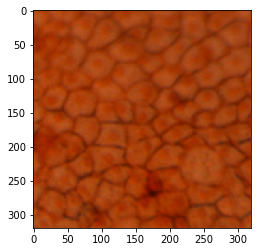

In [6]:
plt.imshow(patches[0])

In [28]:
#save the images to a new folder
import imageio

for i in range(1,len(patches)):
    imageio.imwrite('Data\patches\patch'+str(i)+'.png',patches[i])

In [7]:
import psf

In [8]:
def load_sharpPatches(n):
    # Loaded a set of images
    root_dir = "sharpPatches/"

    
    files = os.listdir(root_dir)
    n = min(192, len(files)) 
    print("Loading " + str(n) + " images")
    imgs = [mpimg.imread(root_dir + files[i]) for i in range(n)]
    
    #print(files[0])

    return imgs



In [9]:
sharpPatches=load_sharpPatches(1)

Loading 192 images


In [10]:
blurredImg=psf.convolve(sharpPatches[0],psf.gauss_kern(11,3))

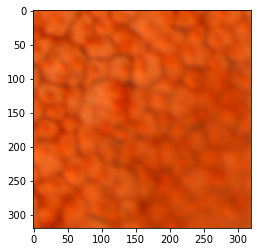

In [11]:
plt.imshow(blurredImg)

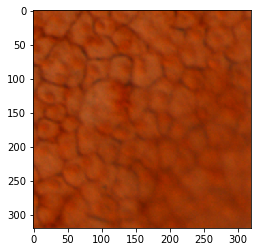

In [12]:
plt.imshow(sharpPatches[0])

In [13]:
import imageio

for i in range(1,len(sharpPatches)):
    blurredPatch=psf.convolve(sharpPatches[i],psf.gauss_kern(11,3))
    imageio.imwrite('blurPatches11_3\patch'+str(i)+'.png',blurredPatch)

In [14]:
for i in range(1,len(sharpPatches)):
    blurredPatch=psf.convolve(sharpPatches[i],psf.gauss_kern(22,9))
    imageio.imwrite('blurPatches22_9\patch'+str(i)+'.png',blurredPatch)